In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

In [2]:
class functions:
    def sigmoid(type):           
        sigmoid = (lambda x: 1 / (1 + np.e ** (-x)),
                   lambda x: sigmoid[0](x) * (1 - sigmoid[0](x)))      
        return sigmoid[type]
    
class functions:
    def sigmoid(type):           
        sigmoid = (lambda x: 1 / (1 + np.e ** (-x)),
                   lambda x: sigmoid[0](x) * (1 - sigmoid[0](x)))      
        return sigmoid[type]
    
    def relu(type, x):
        
        if type == 0:  
            print("antes normal ", x)
            x = np.maximum(0,x)
            print("despues normal ", x)
            time.sleep(10)
            return x
        else:
            print("antes derivada ", x)
            x[x<=0] = 0
            x[x>0] = 1
            print("despues derivada ", x)
            time.sleep(10)
            return x
        
    def lossFunctionSelect(type):
        lossFunc = (lambda yp, yr: (yp - yr) ** 2,
                    lambda yp, yr: 2 * (yp -yr))
        return lossFunc[type]
        
    def lossFunctionSelect(type):
        lossFunc = (lambda yp, yr: (yp - yr) ** 2,
                    lambda yp, yr: 2 * (yp -yr))
        return lossFunc[type]

In [5]:
weights = []
bias = []
loss = []

class neuralNetwork:
    def __init__(self, x, y):
        self.x = x;
        self.w1 = np.random.rand(self.x.shape[1],4)
        self.w2 = np.random.rand(4,1)
        self.b1 = np.random.rand(1,4)
        self.b2 = np.random.rand(1,1)
        self.y = y
        self.output = np.zeros(self.y.shape)
            
    def feedForward(self): 
        self.layer1 = functions.sigmoid(0)(np.dot(self.x, self.w1))
        self.output = functions.sigmoid(0)(np.dot(self.layer1, self.w2))
        self.loss = functions.lossFunctionSelect(0)(self.y, self.output)

        loss.append(np.mean(functions.lossFunctionSelect(0)(self.y, self.output)))
        plt.plot(range(len(loss)), loss)
        plt.show()
        clear_output(wait = True)
        
    def backPropagation(self, lr):
        d_w2 = np.dot(self.layer1.T, functions.lossFunctionSelect(1)(self.y, self.output) * functions.sigmoid(1)(self.output))
        d_w1 = np.dot(self.x.T, (np.dot(functions.lossFunctionSelect(1)(self.y, self.output) * functions.sigmoid(1)(self.output), self.w2.T) * functions.sigmoid(1)(self.layer1)))
        
        #d_b2 = functions.lossFunctionSelect(1)(self.y, self.output) * functions.actFuncSelect(actFunc, 1)(self.output)  
        #d_b1 = np.dot(functions.lossFunctionSelect(1)(self.y, self.output) * functions.actFuncSelect(actFunc, 1)(self.output), self.b2)
        
        self.w1 += d_w1 * lr
        self.w2 += d_w2 * lr
               
        #self.b1 += d_b1 * lr
        #self.b2 += d_b2 * lr
        
        weights.append(d_w1)
        weights.append(d_w2)
        
    def train(self, lr, epochs):
        for epoch in range(epochs):
            nn.feedForward()
            nn.backPropagation(lr)           
        #nn.feedForward(True)   
        
    def predict(self, test_X):      
        self.layer1 = functions.sigmoid(0)(np.dot(test_X, self.w1))
        self.output = functions.sigmoid(0)(np.dot(self.layer1, self.w2))
        self.loss = functions.lossFunctionSelect(0)(self.y, self.output)
        print(self.output)

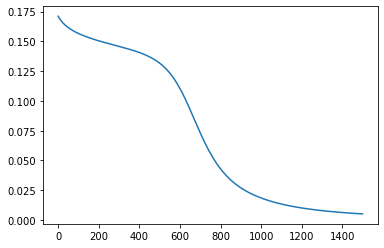

In [6]:
#We train our neural network sith some training data
train_X = np.array([[0,0,0],
                    [1,0,1],
                    [0,1,1],
                    [1,1,1]])

train_Y = np.array([[0],
                    [1],
                    [1],
                    [1],])

nn = neuralNetwork(train_X, train_Y)
nn.train(0.1, 2000)

In [7]:
#We make some predictions with some testing data
test_X = np.array([[1,1,1],
                   [0,0,0],
                   [0,1,1],
                   [0,0,0]])
nn.predict(test_X)

[[0.96864172]
 [0.13148587]
 [0.96874474]
 [0.13148587]]
